In [1]:
import os
import sys
import glob
import torch
import random
import util
import numpy as np
from model2 import UNet3D
from random import shuffle
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split


In [3]:
# Input image
root_src = "/home/local/VANDERBILT/kanakap/deepN4_data_MNI/inputs"
T1s = []
for files in glob.glob(root_src +'/*.nii.gz'):
    T1s.append(files)
T1s.sort()

# Target
root_out = "/home/local/VANDERBILT/kanakap/deepN4_data_MNI/labels"
N4_T1s = []
for files in glob.glob(root_out +'/*.nii.gz'):
    N4_T1s.append(files)
N4_T1s.sort()

In [5]:
# Input image
root_src = "/nfs2/harmonization/BIDS/ADNI_tmp"
T1s = []
for files in glob.glob(root_src +'/*/*/anat/*.nii.gz'):
    T1s.append(files)
T1s.sort()

# Target
root_out = "/nfs2/harmonization/BIDS/ADNI_tmp/derivatives/N4BiasFieldCorrection"
N4_T1s = []
for files in glob.glob(root_out +'/*/*/anat/*.nii.gz'):
    N4_T1s.append(files)
N4_T1s.sort()

In [3]:
# Get all the input and label files 
with open('../qa_all_T1s.txt','r') as f:
    T1s = f.read().splitlines()
with open('../qa_all_N4T1s.txt','r') as f:
    N4_T1s = f.read().splitlines()
T1s.sort()
N4_T1s.sort()

In [7]:
rand = random.sample(range(1, 100), 7)
rand

[47, 24, 52, 67, 53, 15, 11]

In [5]:
train_idx = rand[0:5]
val_idx = rand[5]
test_idx = rand[6]


In [20]:
with open('train_5ds.csv', 'w') as f:
    for i in train_idx:
        f.write("%s,%s\n" % (N4_T1s[i],T1s[i]))
with open('val_5ds.csv', 'w') as f:
    f.write("%s,%s\n" % (N4_T1s[val_idx],T1s[val_idx]))
with open('test_5ds.csv', 'w') as f:
    f.write("%s,%s\n" % (N4_T1s[test_idx],T1s[test_idx]))

In [ ]:
with open('train_ds.csv', 'w') as f:
    for i in range(50):#train_idx:
        f.write("%s,%s\n" % (N4_T1s[i],T1s[i]))
with open('val_ds.csv', 'w') as f:
    for i in range(15):
        f.write("%s,%s\n" % (N4_T1s[i+101],T1s[i+101]))
with open('test_ds.csv', 'w') as f:
    for i in range(1):
        f.write("%s,%s\n" % (N4_T1s[i],T1s[i+117]))

In [4]:
num_fold = 2
total_folds = 4
# Get fold indices
idx_folds = np.array_split(np.arange(len(T1s)), total_folds)

# Get validation indices
val_idx = idx_folds[num_fold-1]

# Get training indices
del idx_folds[num_fold - 1]
train_idx = np.concatenate(idx_folds)

In [19]:
len(val_idx) + len(train_idx)

16525

In [9]:
with open('train_one.csv', 'w') as f:
    for i in range(15):#train_idx:
        f.write("%s,%s\n" % (N4_T1s[i],T1s[i]))
        

In [10]:
with open('val_one.csv', 'w') as f:
    for i in range(15):
        f.write("%s,%s\n" % (N4_T1s[i],T1s[i]))

In [ ]:
with open('test.csv', 'w') as f:
    for i in test_idx:
        f.write("%s,%s\n" % (N4_T1s[i],T1s[i]))

In [9]:
with open('test_ds.csv', 'w') as f:
    for i in range(1):
        f.write("%s,%s\n" % (N4_T1s[i+117],T1s[i+117]))

In [ ]:
np.ran

In [7]:
with open('train_ds.csv', 'w') as f:
    for i in range(50):#train_idx:
        f.write("%s,%s\n" % (N4_T1s[i],T1s[i]))
with open('val_ds.csv', 'w') as f:
    for i in range(15):
        f.write("%s,%s\n" % (N4_T1s[i+101],T1s[i+101]))
with open('test_ds.csv', 'w') as f:
    for i in range(1):
        f.write("%s,%s\n" % (N4_T1s[i],T1s[i+117]))

In [5]:
train_label_set = []
for (a, b) in zip(T1s,N4_T1s):
    train_label_set.append([a,b])

In [6]:
learning_subjects = train_label_set[1:20]
testing_subjects = train_label_set[20:25]
num_fold = 2
total_folds = 4
results_dir_path = '/home/local/VANDERBILT/kanakap/'

In [1]:
import nibabel as nib
import math
import numpy as np

In [36]:
# target1 = nib.load('/home/local/VANDERBILT/kanakap/deepN4_data/labels/sub-6861_ses-adni3year1scanner053_T1w.nii.gz').get_fdata()
pred0 = nib.load('/nfs/masi/kanakap/projects/DeepN4/src/unet_trained_model/pred_1conv_150.nii.gz').get_fdata()
pred1 = nib.load('/nfs/masi/kanakap/projects/DeepN4/src/unet_trained_model/pred_2conv_100.nii.gz').get_fdata()
pred11 = nib.load('/nfs/masi/kanakap/projects/DeepN4/src/unet_trained_model/pred_2conv_150.nii.gz').get_fdata()

target2 = nib.load('/nfs/masi/kanakap/projects/DeepN4/src/unet_trained_model/pred_2conv_150_50sub.nii.gz').get_fdata()
pred2 = nib.load('/home/local/VANDERBILT/kanakap/deepN4_data_MNI/labels/sub-1052_ses-adni3year2scanner141_T1w.nii.gz').get_fdata()

In [ ]:
target1 = nib.load('/home/local/VANDERBILT/kanakap/deepN4_data_MNI/labels/sub-0069_ses-adni2year4scanner100_T1w.nii.gz').get_fdata()
pred0 = nib.load('/nfs/masi/kanakap/projects/DeepN4/src/unet_trained_model/pred_3dunet_100sigmoid.nii.gz').get_fdata()
pred1 = nib.load('/nfs/masi/kanakap/projects/DeepN4/src/unet_trained_model/pred_3dunet_100leakyrely.nii.gz').get_fdata()
pred11 = nib.load('/nfs/masi/kanakap/projects/DeepN4/src/unet_trained_model/pred_3dunet_100relu.nii.gz').get_fdata()

In [17]:
def fun_rmse(a,b):   
    MSE = np.square(np.subtract(a,b)).mean()
    RMSE = math.sqrt(MSE)
    return RMSE

In [18]:
def fun_rmse2(A,B):   
    mse = ((A-B)**2)
    rmse = np.sqrt(mse)
    return rmse

In [31]:
def fun_loss(output, target):
    lf = torch.nn.MSELoss(reduction='mean')
    loss = lf(output, target)
    return loss.item()

In [34]:
target1.shape

(106, 128, 128)

In [33]:
pred1.shape

(106, 128, 128)

In [35]:
print(fun_loss(torch.from_numpy(pred1),torch.from_numpy(target1)))
print(fun_loss(pred11,target1))
print(fun_loss(pred2,target2))

10660.945606013795


TypeError: 'int' object is not callable

In [37]:
print(fun_rmse(target1,pred0))
print(fun_rmse(target1,pred1))
print(fun_rmse(target1,pred11))
print(fun_rmse(target2,pred2))

75.842341924098
103.25185521826617
83.05172505976246
34.97951455127626


In [7]:
# synbo way
# Get fold indices
idx_folds = np.array_split(np.arange(len(learning_subjects)), total_folds)

# Get validation indices
idx_validation = idx_folds[num_fold-1]

# Get training indices
del idx_folds[num_fold - 1]
idx_training = np.concatenate(idx_folds)

# Get training and validation subjects
training_subjects = [learning_subjects[i] for i in idx_training]
validation_subjects = [learning_subjects[i] for i in idx_validation]
# training_subjects = learning_subjects[idx_training.astype(int)]
# validation_subjects = learning_subjects[idx_validation.astype(int)]

In [8]:
# set params
seed = 1
num_epochs = 100
lr = 0.0001
betas = (0.9, 0.999)
weight_decay = 1e-5

prefix = '_'.join(['num_fold', str(num_fold),
                    'total_folds', str(total_folds),
                    'seed', str(seed),
                    'num_epochs', str(num_epochs),
                    'lr', str(lr),
                    'betas', str(betas),
                    'weight_decay', str(weight_decay)])
prefix = os.path.join(results_dir_path, prefix)

# Log training and validation curve
train_curve_path = prefix + '_train.txt'
validation_curve_path = prefix + '_validation.txt'
test_path = prefix + '_test.txt'

In [35]:
# Set seed
torch.manual_seed(seed)

# Get device
device = torch.device("cuda:1")

# Get model
model = UNet3D(1, 1).to(device)

In [10]:
optimizer = optim.Adam(model.parameters(), lr=lr, betas=betas, weight_decay=weight_decay)

NameError: name 'img_data' is not defined

In [37]:
def train_model(derivatives_path, model, device, optimizer):
    # Train mode
    
    model.train()
    total_loss = 0
    with tqdm(total=len(loader)) as pbar:
        for indx in 
    # # Zero gradient
    optimizer.zero_grad()

    # Compute loss
    loss = compute_loss(derivatives_path, model, device)

    # Compute gradient
    loss.backward()

    # Step optimizer
    optimizer.step()

    # Return loss
    return loss.item()


def compute_loss(derivatives_path, model, device):
    # Get predicted images and masks
    img_models = []
    img_targets = []
    # img_masks = []
    #for synb0prep_dir_path in synb0prep_dir_paths:
        # Get data, target, and mask
    #img_data, img_target, img_mask = dataloader.get_data_and_target(synb0prep_dir_path, device)
    img_data, img_target = get_data_and_target(derivatives_path, device)

    # Pass through model
    img_model = model(img_data)

    # Append
    img_models.append(img_model)
    img_targets.append(img_target)
    # img_masks.append(img_mask)

    # Compute loss
    loss = torch.zeros(1, 1, device=device) # Initialize to zero

    # First, get "truth loss"
    #for idx in range(len(synb0prep_dir_paths)):
    for idx in range(len(derivatives_path)):
        # Get model, target, and mark
        img_model = img_models[idx]
        img_target = img_targets[idx]
        # img_mask = img_masks[idx]

        # Compute loss
        loss += F.mse_loss(img_model, img_target)

    # Divide loss by number of synb0prep directories
    #loss /= len(synb0prep_dir_paths)
    loss /= len(derivatives_path)

    # Next, get "difference loss"
    #if len(synb0prep_dir_paths) == 2:
    if len(derivatives_path) == 2:
        # Get model, target, and mark
        img_model1 = img_models[0]
        img_model2 = img_models[1]
        # img_mask = img_masks[0] & img_masks[1]

        # Add difference loss
        loss += F.mse_loss(img_model1, img_model2)
    # elif len(synb0prep_dir_paths) == 1:
    # elif len(derivatives_path) == 1:
    #     pass # Don't add any difference loss
    # else:
    #     raise RunTimeError(train_dir_path + ': Only single and double blips are supported')

    return loss




def validate_model(derivatives_path, model, device):
    # Eval mode
    model.eval()

    # Compute loss
    loss = compute_loss(derivatives_path, model, device)

    # Return loss
    return loss.item()


def pad(img, sz):
    tmp = np.zeros((sz, sz, sz))

    diff = int((sz-img.shape[0])/2)
    lx = max(diff,0)
    lX = min(img.shape[0]+diff,sz)

    diff = (img.shape[0]-sz) / 2
    rx = max(int(np.floor(diff)),0)
    rX = min(img.shape[0]-int(np.ceil(diff)),img.shape[0])

    diff = int((sz - img.shape[1]) / 2)
    ly = max(diff, 0)
    lY = min(img.shape[1] + diff, sz)

    diff = (img.shape[1] - sz) / 2
    ry = max(int(np.floor(diff)), 0)
    rY = min(img.shape[1] - int(np.ceil(diff)), img.shape[1])

    diff = int((sz - img.shape[2]) / 2)
    lz = max(diff, 0)
    lZ = min(img.shape[2] + diff, sz)

    diff = (img.shape[2] - sz) / 2
    rz = max(int(np.floor(diff)), 0)
    rZ = min(img.shape[2] - int(np.ceil(diff)), img.shape[2])

    tmp[lx:lX,ly:lY,lz:lZ] = img[rx:rX,ry:rY,rz:rZ]

    return tmp, [lx,lX,ly,lY,lz,lZ,rx,rX,ry,rY,rz,rZ]


def get_data_and_target(training_path, device):
    # Get paths
    for idx in len(training_path):
        T1_path = training_path[idx][0] #os.path.join(synb0prep_dir_path, 'T1_norm_lin_atlas_2_5.nii.gz')
        # b0_d_path = os.path.join(synb0prep_dir_path, 'b0_d_lin_atlas_2_5.nii.gz')
        n4_path = training_path[idx][1] #os.path.join(synb0prep_dir_path, 'b0_u_lin_atlas_2_5.nii.gz')
        # mask_path = os.path.join(synb0prep_dir_path, 'mask_lin.nii.gz') 

        # Get image
        img_T1 = np.expand_dims(util.get_nii_img(T1_path), axis=3)
        # # img_b0_d = np.expand_dims(util.get_nii_img(b0_d_path), axis=3)
        img_n4 = np.expand_dims(util.get_nii_img(n4_path), axis=3)
        # # img_mask = np.expand_dims(util.get_nii_img(mask_path), axis=3) 

        # # Pad array since I stupidly used template with dimensions not factorable by 8
        # # Assumes input is (77, 91, 77) and pad to (80, 96, 80) with zeros
        #img_T1 = np.pad(img_T1, ((2, 1), (3, 2), (2, 1), (0, 0)), 'constant')
        # # img_b0_d = np.pad(img_b0_d, ((2, 1), (3, 2), (2, 1), (0, 0)), 'constant')
        # img_n4 = np.pad(img_n4, ((2, 1), (3, 2), (2, 1), (0, 0)), 'constant')
        # # img_mask = np.pad(img_mask, ((2, 1), (3, 2), (2, 1), (0, 0)), 'constant')
        img_T1 , _ = pad(img_T1, 96)
        img_n4 , _  = pad(img_n4, 96)

        # Convert to torch img format
        img_T1 = util.nii2torch(img_T1)
        # # img_b0_d = util.nii2torch(img_b0_d)
        img_n4 = util.nii2torch(img_n4)
        # # img_mask = util.nii2torch(img_mask) != 0

        # # Normalize data Should I normize my N4 output?
        # img_T1 = util.normalize_img(img_T1, 150, 0, 1, -1)  # Based on freesurfers T1 normalization
        # # max_img_b0_d = np.percentile(img_b0_d, 99)          # This usually makes majority of CSF be the upper bound
        # # min_img_b0_d = 0                                    # Assumes lower bound is zero (direct from scanner)
        # # img_b0_d = util.normalize_img(img_b0_d, max_img_b0_d, min_img_b0_d, 1, -1)
        # # img_b0_u = util.normalize_img(img_b0_u, max_img_b0_d, min_img_b0_d, 1, -1) # Use min() and max() from distorted data

        # # Set "data" and "target"
        # # img_data = np.concatenate((img_b0_d, img_T1), axis=1)
        # # img_target = img_b0_u

        img_data =  img_T1
        img_target = img_n4

        # Send data to device
        img_data = torch.from_numpy(img_data).float().to(device)
        img_target = torch.from_numpy(img_target).float().to(device)
        # # img_mask = torch.from_numpy(np.array(img_mask, dtype=np.uint8))

        return {'input':img_data, 'target':img_target} #, img_mask

In [47]:
def get_data_and_target(training_path, device):
    # Get paths
    for idx in range(len(training_path)):
        
        T1_path = training_path[idx][0] #os.path.join(synb0prep_dir_path, 'T1_norm_lin_atlas_2_5.nii.gz')
        # b0_d_path = os.path.join(synb0prep_dir_path, 'b0_d_lin_atlas_2_5.nii.gz')
        n4_path = training_path[idx][1] #os.path.join(synb0prep_dir_path, 'b0_u_lin_atlas_2_5.nii.gz')
        # mask_path = os.path.join(synb0prep_dir_path, 'mask_lin.nii.gz') 

        # Get image
        img_T1 = np.expand_dims(util.get_nii_img(T1_path), axis=3)
        # # img_b0_d = np.expand_dims(util.get_nii_img(b0_d_path), axis=3)
        img_n4 = np.expand_dims(util.get_nii_img(n4_path), axis=3)
        # # img_mask = np.expand_dims(util.get_nii_img(mask_path), axis=3) 

        # # Pad array since I stupidly used template with dimensions not factorable by 8
        # # Assumes input is (77, 91, 77) and pad to (80, 96, 80) with zeros
        img_T1 , _ = pad(img_T1, 96)
        img_n4 , _  = pad(img_n4, 96)

        # Convert to torch img format
        img_T1 = util.nii2torch(img_T1)
        # # img_b0_d = util.nii2torch(img_b0_d)
        img_n4 = util.nii2torch(img_n4)
        # # img_mask = util.nii2torch(img_mask) != 0

        img_data =  img_T1
        img_target = img_n4

        # Send data to device
        img_data = torch.from_numpy(img_data).float().to(device)
        img_target = torch.from_numpy(img_target).float().to(device)
        # # img_mask = torch.from_numpy(np.array(img_mask, dtype=np.uint8))

        return {'input':img_data, 'target':img_target} #, img_mask

In [51]:
train_dataset['input'].shape

torch.Size([1, 1, 96, 96, 96])

In [48]:
# Train
model_path_best = ''
l_validation_best = float("inf")
for num_epoch in range(num_epochs):
    print('Epoch: ' + str(num_epoch))

    # Train -------------------------------------------#

    # Jumble data set for each epoch
    shuffle(training_subjects)

    l_train_total = 0
    num_train_total = 0

    #for indx in training_subjects:

        # Train
    
    train_dataset = get_data_and_target(training_subjects, device)
    # train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False, **kwargs)
    # l_train = train_model(training_subjects, model, device, optimizer)

    # # for training_subject in training_subjects:
    # #     # Get sessions
    # #     training_sessions = glob.glob(os.path.join(training_subject, '*'))
    # #     for training_session in training_sessions:
            
    # #         # Get derivatives
    # #         derivatives_path = os.path.join(training_session, 'derivatives')

    # #         # Train
    # #         l_train = train(derivatives_path, model, device, optimizer)

        # Sum loss
    #     l_train_total += l_train

    #     # Increment
    #     num_train_total += 1

    # l_train_mean = l_train_total/num_train_total
    # print('Training loss: ' + str(l_train_mean))

    # with open(train_curve_path, "a") as f:
    #     f.write(str(l_train_mean) + '\n')

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24


KeyboardInterrupt: 

In [26]:
training_subjects[13]

['/nfs2/harmonization/BIDS/ADNI_tmp/sub-0072/ses-adni3year2scanner123/anat/sub-0072_ses-adni3year2scanner123_T1w.nii.gz',
 '/nfs2/harmonization/BIDS/ADNI_tmp/derivatives/N4BiasFieldCorrection/sub-0072/ses-adni3year2scanner123/anat/sub-0072_ses-adni3year2scanner123_T1w.nii.gz']

In [62]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 2            |        cudaMalloc retries: 2         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   76271 KB |   13934 MB |   14463 MB |   14389 MB |\n|       from large pool |   72784 KB |   13931 MB |   14460 MB |   14389 MB |\n|       from small pool |    3487 KB |       3 MB |       3 MB |       0 MB |\n|---------------------------------------------------------------------------|\n| Active memory         |   76271 KB |   13934 MB |   14463 MB |   14389 MB |\n|       from large pool |   72784 KB |   13931 MB |

In [63]:
torch.cuda.empty_cache()

: 

In [2]:
import nibabel as nib
import nibabel.processing as proc
import matplotlib.pyplot as plt

In [30]:
data = nib.load(T1s[0]).get_fdata()
img = nib.load(T1s[0])
voxel_size = [2,2,2]
resampled_img = proc.resample_to_output(img, voxel_size)

In [31]:
print(data.shape)
print(resampled_img.shape)


(208, 240, 256)
(105, 121, 129)


In [32]:
padded_input, _ = pad(resampled_img.get_fdata(), 96)

In [23]:
padded_input, _ = pad(data, 256)

In [33]:
padded_input.shape

(96, 96, 96)

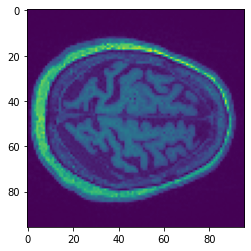

In [34]:
plt.imshow(np.squeeze(padded_input[:,:,75]))

In [29]:
padded_input, _ = pad(data, 96)
resampled_img = proc.resample_to_output(padded_input, voxel_size)
plt.imshow(np.squeeze(resampled_img[:,:,75]))

AttributeError: 'numpy.ndarray' object has no attribute 'affine'

In [24]:
import numpy as np
import nibabel as nib 
import matplotlib.pyplot as plt

In [22]:
def plot_montage(few_files,ax):
    x = 0
    y = 0 
    for z in range(len(few_files)):
        image = nib.load(few_files[z]).get_fdata()
        #image = image[:,:,np.int32(image.shape[2] / 2)]
        image = image[:,:,np.int32(image.shape[2] / 1.7)]
        ax_image = np.squeeze(image)
        ax_image = np.rot90(ax_image,1)
        ax[x,y].imshow(ax_image, cmap='gray')
        ax[x,y].set_title(z)
        ax[x,y].axis('off')
        if y == 4:
            x += 1
        y += 1
        if y != 0 and y % 5 == 0:
            y = 0

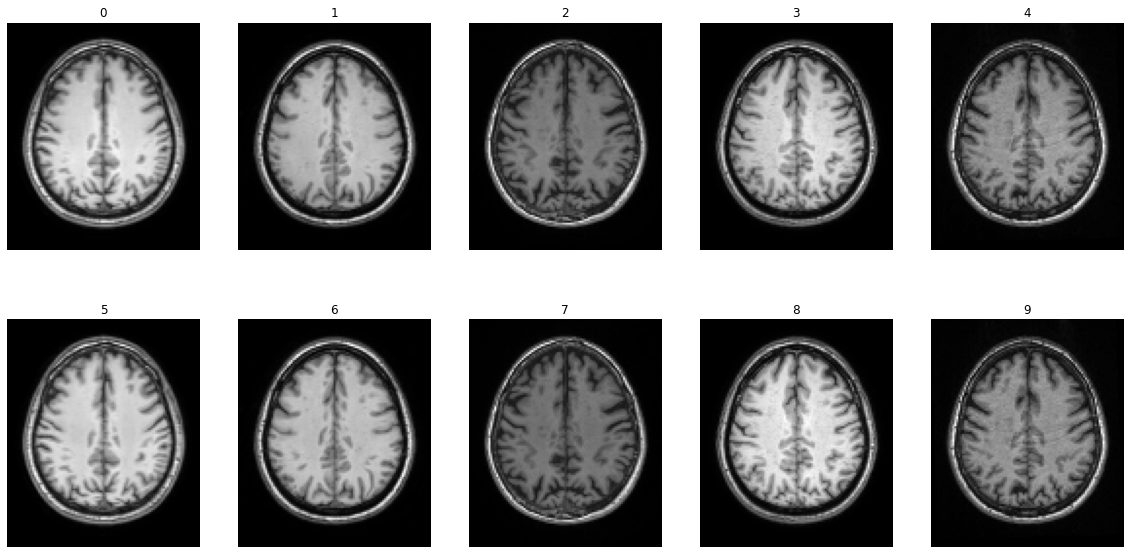

In [37]:
few_files = []
for i in train_idx:
    few_files.append(T1s[i])
for i in train_idx:
    few_files.append(N4_T1s[i])
fig, ax = plt.subplots(2,5,figsize=(20,10))
plot_montage(few_files,ax)